<a href="https://colab.research.google.com/github/yubinn99/1911170/blob/main/ITB_Team1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.8 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=dec2cd0371f7e19f6ca1ff0b1d345c29dd05f1dfda64bc2785c4d8b809ec27fa
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 4.9 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
import mglearn

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 불러오기

KBO = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB2022/KBO투수데이터.csv")

display(KBO.info())
display(KBO)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   323 non-null    int64  
 1   year                 323 non-null    int64  
 2   team                 323 non-null    object 
 3   average_age          323 non-null    float64
 4   runs_per_game        323 non-null    float64
 5   wins                 323 non-null    int64  
 6   losses               323 non-null    int64  
 7   win_loss_percentage  323 non-null    float64
 8   ERA                  323 non-null    float64
 9   run_average_9        323 non-null    float64
 10  games                323 non-null    int64  
 11  games_started        184 non-null    float64
 12  games_finished       184 non-null    float64
 13  complete_game        323 non-null    int64  
 14  shutouts             323 non-null    int64  
 15  saves                323 non-null    int

None

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,...,hit_batter,balks,wild_pitches,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk
0,1,2021,LG Twins,26.3,3.90,72,57,0.558,3.57,3.96,...,97,5.0,43.0,5416,1.312,8.0,0.6,3.9,7.6,1.96
1,2,2021,KT Wiz,28.4,4.06,75,59,0.560,3.67,4.17,...,42,1.0,56.0,5359,1.316,8.4,0.6,3.5,7.5,2.16
2,3,2021,Doosan Bears,27.5,4.57,70,65,0.519,4.28,4.66,...,73,7.0,51.0,5596,1.487,9.2,0.7,4.2,7.4,1.77
3,4,2021,Samsung Lions,28.8,4.57,75,59,0.560,4.29,4.70,...,51,3.0,56.0,5496,1.450,9.3,0.9,3.8,7.4,1.96
4,5,2021,NC Dinos,27.7,4.80,67,67,0.500,4.50,4.95,...,77,8.0,74.0,5575,1.476,9.1,0.9,4.2,7.5,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,319,1982,OB Bears,26.5,3.98,56,24,0.700,3.19,3.95,...,33,NaN,NaN,3020,1.260,7.8,0.5,3.6,3.9,1.10
319,320,1982,MBC Blue Dragons,25.9,4.38,46,33,0.582,3.51,4.45,...,47,NaN,NaN,2994,1.298,8.4,0.7,3.3,5.0,1.52
320,321,1982,Lotte Giants,26.3,4.81,31,49,0.388,3.95,4.86,...,29,NaN,NaN,3080,1.435,9.6,0.9,3.3,4.6,1.39
321,322,1982,Haitai Tigers,23.5,4.85,38,42,0.475,3.76,4.93,...,39,NaN,NaN,3067,1.403,8.9,0.6,3.8,4.4,1.18


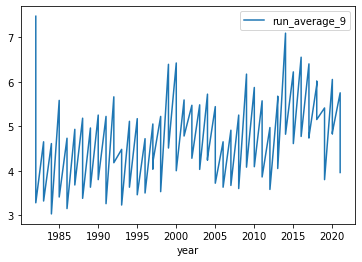

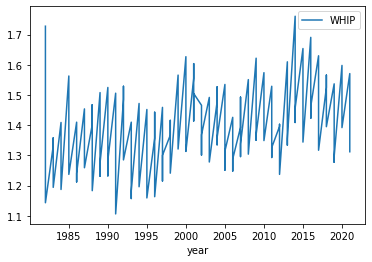

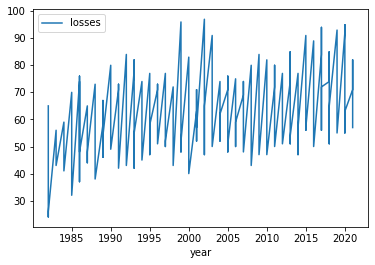

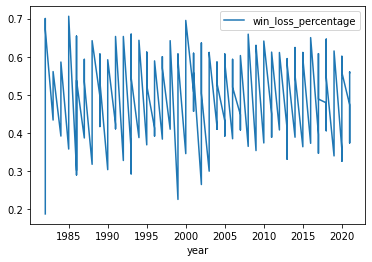

In [ ]:
# 아래 도출한 유의미한 변수들과 연도별의 상관 관계 파악

KBO['date'] = pd.to_datetime(KBO['year'])
KBO.plot(x='year', y='run_average_9')
KBO.plot(x='year', y='WHIP')
KBO.plot(x='year', y='losses')
KBO.plot(x='year', y='win_loss_percentage')

#  분류분석을 위한 데이터 전처리

In [ ]:
# 분류에 필요하지 않을 것 같은 속성 삭제
KBO = KBO.drop(['id', 'average_age', 'year', 'team', 'games', 'games_started', 'games_finished', 'innings_pitched', 'hit_batter', 'batters_faced', 'hits_9', 'homeruns_9', 'walks_9', 'strikeouts_9', 'strikeout_walk', 'date'], axis=1)

In [ ]:
display(KBO)

,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,complete_game,shutouts,saves,hits,runs,earned_runs,home_runs,walks,intentional_walks,strikeouts,balks,wild_pitches,WHIP
0,3.90,72,57,0.558,3.57,3.96,0,18,32,1117,557,501,79,542,17.0,1062,5.0,43.0,1.312
1,4.06,75,59,0.560,3.67,4.17,2,6,33,1166,581,512,85,486,18.0,1051,1.0,56.0,1.316
2,4.57,70,65,0.519,4.28,4.66,2,10,27,1288,653,599,104,586,16.0,1037,7.0,51.0,1.487
3,4.57,75,59,0.560,4.29,4.70,2,14,46,1287,653,596,129,526,13.0,1031,3.0,56.0,1.450
4,4.80,67,67,0.500,4.50,4.95,3,10,33,1256,686,624,122,585,14.0,1046,8.0,74.0,1.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,3.98,56,24,0.700,3.19,3.95,32,4,10,625,318,257,41,289,NaN,318,NaN,NaN,1.260
319,4.38,46,33,0.582,3.51,4.45,19,8,15,660,350,276,52,259,NaN,394,NaN,NaN,1.298
320,4.81,31,49,0.388,3.95,4.86,26,4,4,763,385,313,69,261,NaN,363,NaN,NaN,1.435
321,4.85,38,42,0.475,3.76,4.93,24,2,3,698,388,296,50,295,NaN,348,NaN,NaN,1.403


In [ ]:
# 변수명 가시성이 있게 변경하기
KBO.columns = ['게임당실점', '승리', '패배', '승률', '방어율', '9이닝평균실점', '완투승', '완봉승', '세이브', '피안타', '실점', '자책점', '피홈런', '진루', '자동고의사구', '삼진아웃', '보크', '와일드피치', 'WHIP']

In [ ]:
display(KBO)

,게임당실점,승리,패배,승률,방어율,9이닝평균실점,완투승,완봉승,세이브,피안타,실점,자책점,피홈런,진루,자동고의사구,삼진아웃,보크,와일드피치,WHIP
0,3.90,72,57,0.558,3.57,3.96,0,18,32,1117,557,501,79,542,17.0,1062,5.0,43.0,1.312
1,4.06,75,59,0.560,3.67,4.17,2,6,33,1166,581,512,85,486,18.0,1051,1.0,56.0,1.316
2,4.57,70,65,0.519,4.28,4.66,2,10,27,1288,653,599,104,586,16.0,1037,7.0,51.0,1.487
3,4.57,75,59,0.560,4.29,4.70,2,14,46,1287,653,596,129,526,13.0,1031,3.0,56.0,1.450
4,4.80,67,67,0.500,4.50,4.95,3,10,33,1256,686,624,122,585,14.0,1046,8.0,74.0,1.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,3.98,56,24,0.700,3.19,3.95,32,4,10,625,318,257,41,289,NaN,318,NaN,NaN,1.260
319,4.38,46,33,0.582,3.51,4.45,19,8,15,660,350,276,52,259,NaN,394,NaN,NaN,1.298
320,4.81,31,49,0.388,3.95,4.86,26,4,4,763,385,313,69,261,NaN,363,NaN,NaN,1.435
321,4.85,38,42,0.475,3.76,4.93,24,2,3,698,388,296,50,295,NaN,348,NaN,NaN,1.403


In [ ]:
# 결측치 처리 - 보크 & 와일드피치 & 자동고의사구 - null 값이 너무 많아서 drop
KBO = KBO.drop(['보크', '와일드피치', '자동고의사구'], axis=1)

In [ ]:
KBO.describe()

,게임당실점,승리,패배,승률,방어율,9이닝평균실점,완투승,완봉승,세이브,피안타,실점,자책점,피홈런,진루,삼진아웃,WHIP
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,4.621858,62.507740,62.482972,0.500043,4.207833,4.689783,10.823529,6.309598,28.798762,1149.000000,596.346749,536.275542,106.715170,448.959752,762.609907,1.400588
std,0.734223,12.508225,12.446988,0.087081,0.750075,0.768520,12.022616,3.472626,9.402312,177.545865,131.061590,127.222997,36.760506,83.547481,206.319423,0.115192
min,2.980000,15.000000,24.000000,0.188000,2.540000,3.030000,0.000000,0.000000,3.000000,618.000000,257.000000,211.000000,38.000000,187.000000,175.000000,1.106000
25%,4.040000,54.000000,53.000000,0.444500,3.630000,4.090000,2.000000,4.000000,24.000000,1035.500000,506.000000,446.500000,78.000000,395.000000,639.000000,1.314000
50%,4.620000,63.000000,62.000000,0.504000,4.220000,4.670000,4.000000,6.000000,30.000000,1139.000000,582.000000,529.000000,101.000000,446.000000,793.000000,1.402000
75%,5.060000,71.000000,71.500000,0.561500,4.700000,5.180000,20.000000,8.500000,36.000000,1275.000000,694.500000,629.000000,132.500000,512.000000,911.500000,1.478000
max,7.180000,93.000000,97.000000,0.706000,6.350000,7.470000,56.000000,19.000000,52.000000,1593.000000,927.000000,838.000000,194.000000,670.000000,1194.000000,1.761000


In [ ]:
display(KBO)

,게임당실점,승리,패배,승률,방어율,9이닝평균실점,완투승,완봉승,세이브,피안타,실점,자책점,피홈런,진루,삼진아웃,WHIP
0,3.90,72,57,0.558,3.57,3.96,0,18,32,1117,557,501,79,542,1062,1.312
1,4.06,75,59,0.560,3.67,4.17,2,6,33,1166,581,512,85,486,1051,1.316
2,4.57,70,65,0.519,4.28,4.66,2,10,27,1288,653,599,104,586,1037,1.487
3,4.57,75,59,0.560,4.29,4.70,2,14,46,1287,653,596,129,526,1031,1.450
4,4.80,67,67,0.500,4.50,4.95,3,10,33,1256,686,624,122,585,1046,1.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,3.98,56,24,0.700,3.19,3.95,32,4,10,625,318,257,41,289,318,1.260
319,4.38,46,33,0.582,3.51,4.45,19,8,15,660,350,276,52,259,394,1.298
320,4.81,31,49,0.388,3.95,4.86,26,4,4,763,385,313,69,261,363,1.435
321,4.85,38,42,0.475,3.76,4.93,24,2,3,698,388,296,50,295,348,1.403


In [ ]:
display(KBO.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   게임당실점    323 non-null    float64
 1   승리       323 non-null    int64  
 2   패배       323 non-null    int64  
 3   승률       323 non-null    float64
 4   방어율      323 non-null    float64
 5   9이닝평균실점  323 non-null    float64
 6   완투승      323 non-null    int64  
 7   완봉승      323 non-null    int64  
 8   세이브      323 non-null    int64  
 9   피안타      323 non-null    int64  
 10  실점       323 non-null    int64  
 11  자책점      323 non-null    int64  
 12  피홈런      323 non-null    int64  
 13  진루       323 non-null    int64  
 14  삼진아웃     323 non-null    int64  
 15  WHIP     323 non-null    float64
dtypes: float64(5), int64(11)
memory usage: 40.5 KB


None

In [ ]:
KBO_buffer = KBO.copy()

In [ ]:
display(KBO_buffer)

,게임당실점,승리,패배,승률,방어율,9이닝평균실점,완투승,완봉승,세이브,피안타,실점,자책점,피홈런,진루,삼진아웃,WHIP
0,3.90,72,57,0.558,3.57,3.96,0,18,32,1117,557,501,79,542,1062,1.312
1,4.06,75,59,0.560,3.67,4.17,2,6,33,1166,581,512,85,486,1051,1.316
2,4.57,70,65,0.519,4.28,4.66,2,10,27,1288,653,599,104,586,1037,1.487
3,4.57,75,59,0.560,4.29,4.70,2,14,46,1287,653,596,129,526,1031,1.450
4,4.80,67,67,0.500,4.50,4.95,3,10,33,1256,686,624,122,585,1046,1.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,3.98,56,24,0.700,3.19,3.95,32,4,10,625,318,257,41,289,318,1.260
319,4.38,46,33,0.582,3.51,4.45,19,8,15,660,350,276,52,259,394,1.298
320,4.81,31,49,0.388,3.95,4.86,26,4,4,763,385,313,69,261,363,1.435
321,4.85,38,42,0.475,3.76,4.93,24,2,3,698,388,296,50,295,348,1.403


In [ ]:
# 각 변수당 가중치 : 1점 & 2점 & 3점

# 게임당 실점 가중치 column 생성
# 2.98~4.38 3점 / 4.39~5.78 2점 / 5.79~7.18 1점
KBO_buffer['게임당 실점 가중치'] = 0

for i in range(0, 323):
  if KBO_buffer.loc[i,'게임당실점'] >= 2.98 and KBO_buffer.loc[i,'게임당실점'] <= 4.38:
    KBO_buffer.loc[i,'게임당 실점 가중치'] = 3
  elif KBO_buffer.loc[i,'게임당실점'] >= 4.39 and KBO_buffer.loc[i,'게임당실점'] <= 5.78:
    KBO_buffer.loc[i,'게임당 실점 가중치'] = 2
  else:
    KBO_buffer.loc[i,'게임당 실점 가중치'] = 1

# 승리 가중치 column 생성
# * 승리 [15-93] 1점: 15~55 2점: 56~80 3점: 81~93
KBO_buffer['승리 가중치'] = 0

for i in range(0, 323):
  if KBO_buffer.loc[i,'승리'] >= 15 and KBO_buffer.loc[i,'승리'] <= 55:
    KBO_buffer.loc[i,'승리 가중치'] = 1
  elif KBO_buffer.loc[i,'승리'] >= 56 and KBO_buffer.loc[i,'승리'] <= 80:
    KBO_buffer.loc[i,'승리 가중치'] = 2
  else:
    KBO_buffer.loc[i,'승리 가중치'] = 3


# 패배 가중치 column 생성
# * 패배 [24 – 97 ; 24씩] 24 ~ 48 :3점 49 ~ 72 :2점 73 ~ 97 :1점
KBO_buffer['패배 가중치'] = 0

for i in range(0, 323):
  if KBO_buffer.loc[i,'패배'] >= 24 and KBO_buffer.loc[i,'패배'] <= 48:
    KBO_buffer.loc[i,'패배 가중치'] = 3
  elif KBO_buffer.loc[i,'패배'] >= 49 and KBO_buffer.loc[i,'패배'] <= 72:
    KBO_buffer.loc[i,'패배 가중치'] = 2
  else:
    KBO_buffer.loc[i,'패배 가중치'] = 1
    
# 승률 가중치 column 생성
KBO_buffer['승률 가중치'] = 0

for i in range(0, 323):
  if KBO_buffer.loc[i,'승률'] >= 0.188 and KBO_buffer.loc[i,'승률'] <= 0.350:
    KBO_buffer.loc[i,'승률 가중치'] = 1
  elif KBO_buffer.loc[i,'승률'] >= 0.351 and KBO_buffer.loc[i,'승률'] <= 0.500:
    KBO_buffer.loc[i,'승률 가중치'] = 2
  else:
    KBO_buffer.loc[i,'승률 가중치'] = 3

# 방어율 가중치 column 생성
# [방어율] 2.54-6.35 1: 2.54 ~ 3.90 2: 3.91 ~ 5.50 3:  5.51~6.35
KBO_buffer['방어율 가중치'] = 0

for i in range(0, 323):
  if KBO_buffer.loc[i,'방어율'] >= 2.54 and KBO_buffer.loc[i,'방어율'] <= 3.90:
    KBO_buffer.loc[i,'방어율 가중치'] = 1
  elif KBO_buffer.loc[i,'방어율'] >= 3.91 and KBO_buffer.loc[i,'방어율'] <= 5.50:
    KBO_buffer.loc[i,'방어율 가중치'] = 2
  else:
    KBO_buffer.loc[i,'방어율 가중치'] = 3

# 9이닝 평균실점 가중치 column 생성
# [9이닝 평균실점] 2.54-7.47 1: 5.51 ~ 7.47 2: 3.71 ~ 5.50 3: 2.54 ~ 3.70
KBO_buffer['9이닝평균실점 가중치'] = 0

for i in range(0, 323):
  if KBO_buffer.loc[i,'9이닝평균실점'] >= 5.51 and KBO_buffer.loc[i,'9이닝평균실점'] <= 7.47:
    KBO_buffer.loc[i,'9이닝평균실점 가중치'] = 1
  elif KBO_buffer.loc[i,'9이닝평균실점'] >= 3.71 and KBO_buffer.loc[i,'9이닝평균실점'] <= 5.50:
    KBO_buffer.loc[i,'9이닝평균실점 가중치'] = 2
  else:
    KBO_buffer.loc[i,'9이닝평균실점 가중치'] = 3

# 완투승 column 생성
# [완투승] 0-56 1: 0 ~ 25 2: 26 ~ 40 3: 41 ~56
KBO_buffer['완투승 가중치'] = 0

for i in range(0, 323):
  if KBO_buffer.loc[i,'완투승'] >= 0 and KBO_buffer.loc[i,'완투승'] <= 25:
    KBO_buffer.loc[i,'완투승 가중치'] = 1
  elif KBO_buffer.loc[i,'완투승'] >= 26 and KBO_buffer.loc[i,'완투승'] <= 40:
    KBO_buffer.loc[i,'완투승 가중치'] = 2
  else:
    KBO_buffer.loc[i,'완투승 가중치'] = 3

# 완봉승 column 생성
# [완봉승] 0 - 19 1: 0 ~ 3 2: 4~10 3:  11 ~ 19 
KBO_buffer['완봉승 가중치'] = 0

for i in range(0, 323):
  if KBO_buffer.loc[i,'완봉승'] >= 0 and KBO_buffer.loc[i,'완봉승'] <= 3:
    KBO_buffer.loc[i,'완봉승 가중치'] = 1
  elif KBO_buffer.loc[i,'완봉승'] >= 4 and KBO_buffer.loc[i,'완봉승'] <= 10:
    KBO_buffer.loc[i,'완봉승 가중치'] = 2
  else:
    KBO_buffer.loc[i,'완봉승 가중치'] = 3

# 세이브 column 생성
# [세이브] 3-52 1: 3 ~ 20 2: 21 ~ 35 3:  36 ~ 52
KBO_buffer['세이브 가중치'] = 0

for i in range(0, 323):
  if KBO_buffer.loc[i,'세이브'] >= 3 and KBO_buffer.loc[i,'세이브'] <= 20:
    KBO_buffer.loc[i,'세이브 가중치'] = 1
  elif KBO_buffer.loc[i,'세이브'] >= 21 and KBO_buffer.loc[i,'세이브'] <= 35:
    KBO_buffer.loc[i,'세이브 가중치'] = 2
  else:
    KBO_buffer.loc[i,'세이브 가중치'] = 3

# 피안타 column 생성
# [피안타] 618 ~ 1593 1: 1201 ~ 1593 2: 901 ~ 1200 3: 618~ 900
KBO_buffer['피안타 가중치'] = 0

for i in range(0, 323):
  if KBO_buffer.loc[i,'피안타'] >= 1201 and KBO_buffer.loc[i,'피안타'] <= 1593:
    KBO_buffer.loc[i,'피안타 가중치'] = 1
  elif KBO_buffer.loc[i,'피안타'] >= 901 and KBO_buffer.loc[i,'피안타'] <= 1200:
    KBO_buffer.loc[i,'피안타 가중치'] = 2
  else:
    KBO_buffer.loc[i,'피안타 가중치'] = 3

# 실점 column 생성
# [실점] 258 ~ 927 1: 601 ~ 927 2: 401 ~  600 3: 258 ~ 400  
KBO_buffer['실점 가중치'] = 0

for i in range(0, 323):
  if KBO_buffer.loc[i,'실점'] >= 601 and KBO_buffer.loc[i,'실점'] <= 927:
    KBO_buffer.loc[i,'실점 가중치'] = 1
  elif KBO_buffer.loc[i,'실점'] >= 401 and KBO_buffer.loc[i,'실점'] <= 600:
    KBO_buffer.loc[i,'실점 가중치'] = 2
  else:
    KBO_buffer.loc[i,'실점 가중치'] = 3

# 자책점 column 생성
# [자책점] 211 ~ 838 1: 651 ~ 838 2: 451 ~ 650 3: 211 ~ 450
KBO_buffer['자책점 가중치'] = 0

for i in range(0, 323):
  if KBO_buffer.loc[i,'자책점'] >= 651 and KBO_buffer.loc[i,'자책점'] <= 838:
    KBO_buffer.loc[i,'자책점 가중치'] = 1
  elif KBO_buffer.loc[i,'자책점'] >= 451 and KBO_buffer.loc[i,'자책점'] <= 650:
    KBO_buffer.loc[i,'자책점 가중치'] = 2
  else:
    KBO_buffer.loc[i,'자책점 가중치'] = 3    

# 피홈런 column 생성
# [피홈런] 38 ~ 194 1: 131 ~ 194 2: 81 ~ 130 3: 38 ~ 80
KBO_buffer['피홈런 가중치'] = 0

for i in range(0, 323):
  if KBO_buffer.loc[i,'피홈런'] >= 38 and KBO_buffer.loc[i,'피홈런'] <= 194:
    KBO_buffer.loc[i,'피홈런 가중치'] = 1
  elif KBO_buffer.loc[i,'피홈런'] >= 81 and KBO_buffer.loc[i,'피홈런'] <= 130:
    KBO_buffer.loc[i,'피홈런 가중치'] = 2
  else:
    KBO_buffer.loc[i,'피홈런 가중치'] = 3

# 진루 column 생성
# [진루] 187 ~ 670 1: 451 ~ 670 2: 301 ~ 450 3: 187 ~ 300
KBO_buffer['진루 가중치'] = 0

for i in range(0, 323):
  if KBO_buffer.loc[i,'진루'] >= 451 and KBO_buffer.loc[i,'진루'] <= 670:
    KBO_buffer.loc[i,'진루 가중치'] = 1
  elif KBO_buffer.loc[i,'진루'] >= 301 and KBO_buffer.loc[i,'진루'] <= 450:
    KBO_buffer.loc[i,'진루 가중치'] = 2
  else:
    KBO_buffer.loc[i,'진루 가중치'] = 3

# 삼진아웃 column 생성
# [삼진아웃] 175 ~ 1194 1: 175 ~ 650 2: 651 ~ 900 3: 901 ~ 1194
KBO_buffer['삼진아웃 가중치'] = 0

for i in range(0, 323):
  if KBO_buffer.loc[i,'삼진아웃'] >= 175 and KBO_buffer.loc[i,'삼진아웃'] <= 650:
    KBO_buffer.loc[i,'삼진아웃 가중치'] = 1
  elif KBO_buffer.loc[i,'삼진아웃'] >= 651 and KBO_buffer.loc[i,'삼진아웃'] <= 900:
    KBO_buffer.loc[i,'삼진아웃 가중치'] = 2
  else:
    KBO_buffer.loc[i,'삼진아웃 가중치'] = 3

# WHIP column 생성
# [WHIP] 1.106 ~ 1.761 1:  1.501 ~ 1.761 2: 1.301 ~ 1.500 3:  1.106 ~ 1.300
KBO_buffer['WHIP 가중치'] = 0

for i in range(0, 323):
  if KBO_buffer.loc[i,'WHIP'] >= 1.501 and KBO_buffer.loc[i,'WHIP'] <= 1.761:
    KBO_buffer.loc[i,'WHIP 가중치'] = 1
  elif KBO_buffer.loc[i,'WHIP'] >= 1.301 and KBO_buffer.loc[i,'WHIP'] <= 1.500:
    KBO_buffer.loc[i,'WHIP 가중치'] = 2
  else:
    KBO_buffer.loc[i,'WHIP 가중치'] = 3

display(KBO_buffer)


,게임당실점,승리,패배,승률,방어율,9이닝평균실점,완투승,완봉승,세이브,피안타,...,완투승 가중치,완봉승 가중치,세이브 가중치,피안타 가중치,실점 가중치,자책점 가중치,피홈런 가중치,진루 가중치,삼진아웃 가중치,WHIP 가중치
0,3.90,72,57,0.558,3.57,3.96,0,18,32,1117,...,1,3,2,2,2,2,1,1,3,2
1,4.06,75,59,0.560,3.67,4.17,2,6,33,1166,...,1,2,2,2,2,2,1,1,3,2
2,4.57,70,65,0.519,4.28,4.66,2,10,27,1288,...,1,2,2,1,1,2,1,1,3,2
3,4.57,75,59,0.560,4.29,4.70,2,14,46,1287,...,1,3,3,1,1,2,1,1,3,2
4,4.80,67,67,0.500,4.50,4.95,3,10,33,1256,...,1,2,2,1,1,2,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,3.98,56,24,0.700,3.19,3.95,32,4,10,625,...,2,2,1,3,3,3,1,3,1,3
319,4.38,46,33,0.582,3.51,4.45,19,8,15,660,...,1,2,1,3,3,3,1,3,1,3
320,4.81,31,49,0.388,3.95,4.86,26,4,4,763,...,2,2,1,3,3,3,1,3,1,2
321,4.85,38,42,0.475,3.76,4.93,24,2,3,698,...,1,1,1,3,3,3,1,3,1,2


In [ ]:
KBO_sum = KBO_buffer['게임당 실점 가중치'] + KBO_buffer['승리 가중치'] + KBO_buffer['패배 가중치'] + KBO_buffer['승률 가중치'] + KBO_buffer['방어율 가중치']	+ KBO_buffer['9이닝평균실점 가중치'] +	KBO_buffer['완투승 가중치'] + KBO_buffer['완봉승 가중치'] + KBO_buffer['세이브 가중치'] + KBO_buffer['피안타 가중치'] + KBO_buffer['실점 가중치'] +	KBO_buffer['자책점 가중치']	+ KBO_buffer['피홈런 가중치'] + KBO_buffer['진루 가중치'] + KBO_buffer['삼진아웃 가중치'] + KBO_buffer['WHIP 가중치']
KBO_buffer['가중치 전체 합'] = KBO_sum

import numpy
print(numpy.mean(KBO_buffer['가중치 전체 합']))
print(numpy.median(KBO_buffer['가중치 전체 합']))

# 평균 29.20, 중간값 29로 29이상이면 유망도 'yes' 미만이면 'no'로 나눔
KBO_buffer['유망도']  = 0

for i in range(0, 323):
  if KBO_buffer.loc[i,'가중치 전체 합'] >= 29:
    KBO_buffer.loc[i,'유망도'] = 'yes'
  else:
    KBO_buffer.loc[i,'유망도'] = 'no'

display(KBO_buffer)

29.20123839009288
29.0


,게임당실점,승리,패배,승률,방어율,9이닝평균실점,완투승,완봉승,세이브,피안타,...,세이브 가중치,피안타 가중치,실점 가중치,자책점 가중치,피홈런 가중치,진루 가중치,삼진아웃 가중치,WHIP 가중치,가중치 전체 합,유망도
0,3.90,72,57,0.558,3.57,3.96,0,18,32,1117,...,2,2,2,2,1,1,3,2,32,yes
1,4.06,75,59,0.560,3.67,4.17,2,6,33,1166,...,2,2,2,2,1,1,3,2,31,yes
2,4.57,70,65,0.519,4.28,4.66,2,10,27,1288,...,2,1,1,2,1,1,3,2,29,yes
3,4.57,75,59,0.560,4.29,4.70,2,14,46,1287,...,3,1,1,2,1,1,3,2,31,yes
4,4.80,67,67,0.500,4.50,4.95,3,10,33,1256,...,2,1,1,2,1,1,3,2,28,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,3.98,56,24,0.700,3.19,3.95,32,4,10,625,...,1,3,3,3,1,3,1,3,36,yes
319,4.38,46,33,0.582,3.51,4.45,19,8,15,660,...,1,3,3,3,1,3,1,3,34,yes
320,4.81,31,49,0.388,3.95,4.86,26,4,4,763,...,1,3,3,3,1,3,1,2,32,yes
321,4.85,38,42,0.475,3.76,4.93,24,2,3,698,...,1,3,3,3,1,3,1,2,30,yes


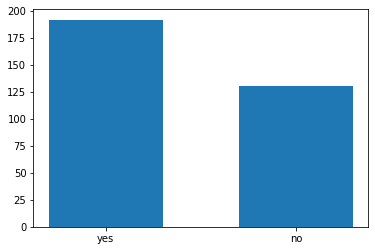

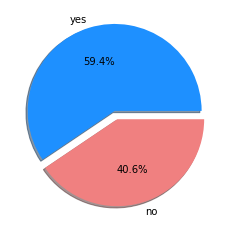

In [ ]:
# 유망도 비율 시각화

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(2)
potential = ['yes', 'no']
values = [192, 131]

plt.bar(x, values, width=0.6)
plt.xticks(x, potential)

plt.show()

#파이차트 

import matplotlib.pyplot as plt

ratio = [192, 131]
labels = ['yes', 'no']
explode = [0.05, 0.05]
colors = ['dodgerblue', 'lightcoral']

plt.pie(ratio, labels=labels, autopct='%.1f%%', explode = explode, shadow = True, colors = colors)
plt.show()

In [ ]:
# - 가중치 컬럼 모두 drop 작업 위해 새로운 데이터 프레임 생성
KBO_final = KBO_buffer.copy()

In [ ]:
display(KBO_final)

,게임당실점,승리,패배,승률,방어율,9이닝평균실점,완투승,완봉승,세이브,피안타,...,세이브 가중치,피안타 가중치,실점 가중치,자책점 가중치,피홈런 가중치,진루 가중치,삼진아웃 가중치,WHIP 가중치,가중치 전체 합,유망도
0,3.90,72,57,0.558,3.57,3.96,0,18,32,1117,...,2,2,2,2,1,1,3,2,32,yes
1,4.06,75,59,0.560,3.67,4.17,2,6,33,1166,...,2,2,2,2,1,1,3,2,31,yes
2,4.57,70,65,0.519,4.28,4.66,2,10,27,1288,...,2,1,1,2,1,1,3,2,29,yes
3,4.57,75,59,0.560,4.29,4.70,2,14,46,1287,...,3,1,1,2,1,1,3,2,31,yes
4,4.80,67,67,0.500,4.50,4.95,3,10,33,1256,...,2,1,1,2,1,1,3,2,28,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,3.98,56,24,0.700,3.19,3.95,32,4,10,625,...,1,3,3,3,1,3,1,3,36,yes
319,4.38,46,33,0.582,3.51,4.45,19,8,15,660,...,1,3,3,3,1,3,1,3,34,yes
320,4.81,31,49,0.388,3.95,4.86,26,4,4,763,...,1,3,3,3,1,3,1,2,32,yes
321,4.85,38,42,0.475,3.76,4.93,24,2,3,698,...,1,3,3,3,1,3,1,2,30,yes


In [ ]:
KBO_final = KBO_final.drop(['게임당 실점 가중치', '승리 가중치', '패배 가중치', '승률 가중치', '방어율 가중치', '9이닝평균실점 가중치', '완투승 가중치', '완봉승 가중치', '세이브 가중치', '피안타 가중치', '실점 가중치', '자책점 가중치', '피홈런 가중치', '진루 가중치', '삼진아웃 가중치', 'WHIP 가중치', '가중치 전체 합'], axis=1)

display(KBO_final) #17열

,게임당실점,승리,패배,승률,방어율,9이닝평균실점,완투승,완봉승,세이브,피안타,실점,자책점,피홈런,진루,삼진아웃,WHIP,유망도
0,3.90,72,57,0.558,3.57,3.96,0,18,32,1117,557,501,79,542,1062,1.312,yes
1,4.06,75,59,0.560,3.67,4.17,2,6,33,1166,581,512,85,486,1051,1.316,yes
2,4.57,70,65,0.519,4.28,4.66,2,10,27,1288,653,599,104,586,1037,1.487,yes
3,4.57,75,59,0.560,4.29,4.70,2,14,46,1287,653,596,129,526,1031,1.450,yes
4,4.80,67,67,0.500,4.50,4.95,3,10,33,1256,686,624,122,585,1046,1.476,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,3.98,56,24,0.700,3.19,3.95,32,4,10,625,318,257,41,289,318,1.260,yes
319,4.38,46,33,0.582,3.51,4.45,19,8,15,660,350,276,52,259,394,1.298,yes
320,4.81,31,49,0.388,3.95,4.86,26,4,4,763,385,313,69,261,363,1.435,yes
321,4.85,38,42,0.475,3.76,4.93,24,2,3,698,388,296,50,295,348,1.403,yes


In [ ]:
KBO_final.iloc[:, :16]

,게임당실점,승리,패배,승률,방어율,9이닝평균실점,완투승,완봉승,세이브,피안타,실점,자책점,피홈런,진루,삼진아웃,WHIP
0,3.90,72,57,0.558,3.57,3.96,0,18,32,1117,557,501,79,542,1062,1.312
1,4.06,75,59,0.560,3.67,4.17,2,6,33,1166,581,512,85,486,1051,1.316
2,4.57,70,65,0.519,4.28,4.66,2,10,27,1288,653,599,104,586,1037,1.487
3,4.57,75,59,0.560,4.29,4.70,2,14,46,1287,653,596,129,526,1031,1.450
4,4.80,67,67,0.500,4.50,4.95,3,10,33,1256,686,624,122,585,1046,1.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,3.98,56,24,0.700,3.19,3.95,32,4,10,625,318,257,41,289,318,1.260
319,4.38,46,33,0.582,3.51,4.45,19,8,15,660,350,276,52,259,394,1.298
320,4.81,31,49,0.388,3.95,4.86,26,4,4,763,385,313,69,261,363,1.435
321,4.85,38,42,0.475,3.76,4.93,24,2,3,698,388,296,50,295,348,1.403


In [ ]:
KBO_final.iloc[:, 16]

0      yes
1      yes
2      yes
3      yes
4       no
      ... 
318    yes
319    yes
320    yes
321    yes
322     no
Name: 유망도, Length: 323, dtype: object

In [ ]:
# train 데이터 test 데이터 나누기

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = KBO_final.iloc[:, :16]  # 독립
y = KBO_final.iloc[:, 16]   # 종속

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#독립변수의 시험용, 훈련용, 종속변수의 시험용, 훈련용

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)



# 의사결정나무

In [ ]:
# Decision Tree 
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.988
시험용 데이터 정확도: 0.908


In [ ]:
KBO_final['유망도'].unique()

array(['yes', 'no'], dtype=object)

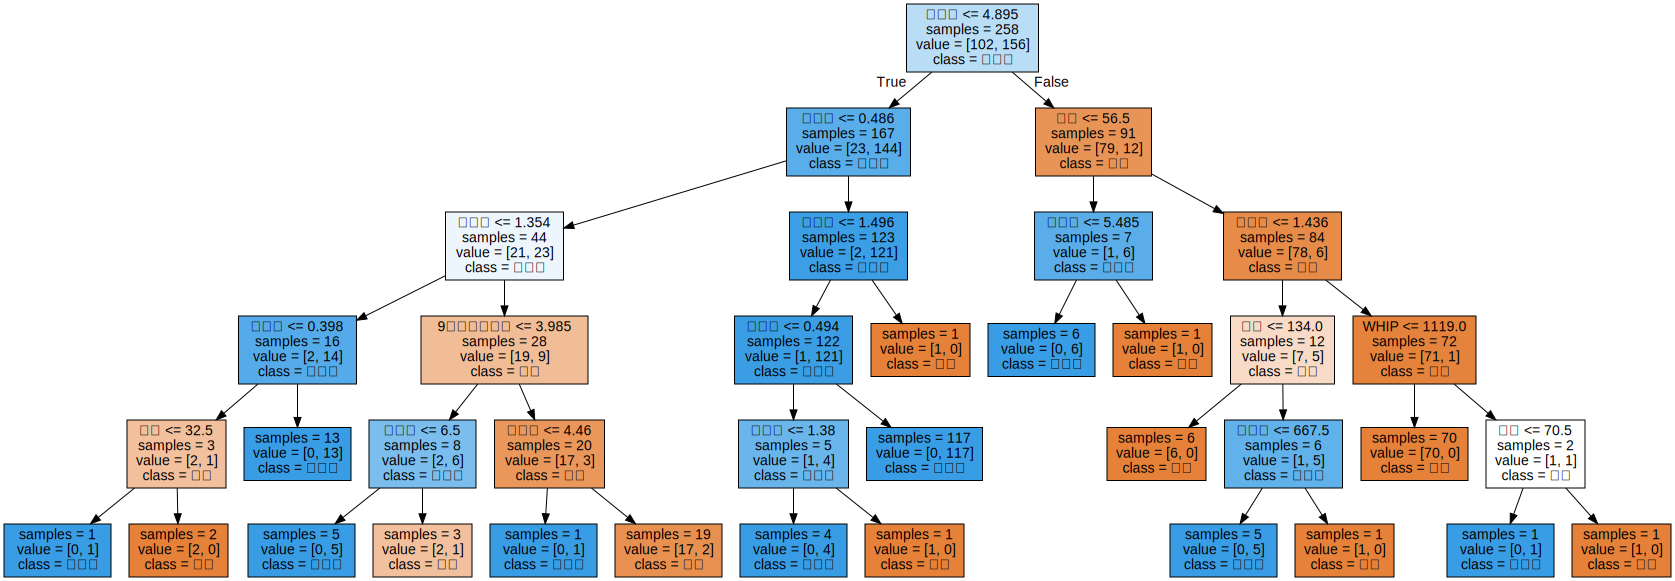

In [ ]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=[ "유망", "비유망"],
                feature_names=KBO_final.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [ ]:
KBO_final.columns[0:16]

Index(['게임당실점', '승리', '패배', '승률', '방어율', '9이닝평균실점', '완투승', '완봉승', '세이브', '피안타',
       '실점', '자책점', '피홈런', '진루', '삼진아웃', 'WHIP'],
      dtype='object')

In [ ]:
import numpy as np

def plot_feature_importances_health(model):
    plt.rcParams["figure.figsize"] = (9,6) 
    n_features = len(KBO_final.columns[0:16])  
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), KBO_final.columns[0:16])   
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) 

In [ ]:
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq        

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)                               

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") 
#nanum_font

sys_font number: 48
['/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold

In [ ]:
import matplotlib.font_manager as fm  
import matplotlib as mpl               
import matplotlib.pyplot as plt 

mpl.rcParams['axes.unicode_minus'] = False  

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)

NanumGothic Eco


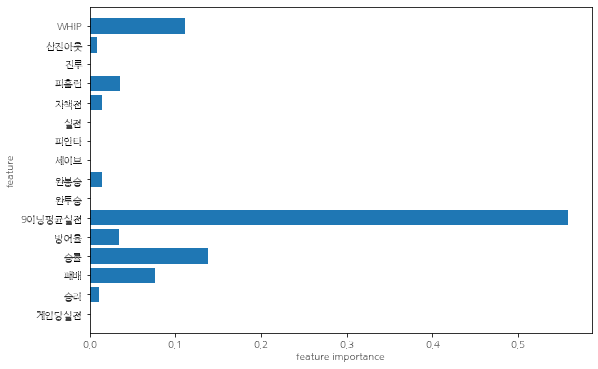

In [ ]:
fm._rebuild()

# 타깃 변수인 '유망'을 찾아내는데 있어서 중요하게 작용한 변수 in decision tree
plot_feature_importances_health(tree)

In [ ]:
tree.feature_importances_

array([0.        , 0.01125779, 0.07580448, 0.13784122, 0.03473831,
       0.55797249, 0.        , 0.01407223, 0.        , 0.        ,
       0.        , 0.01407223, 0.03518058, 0.        , 0.0082088 ,
       0.11085187])

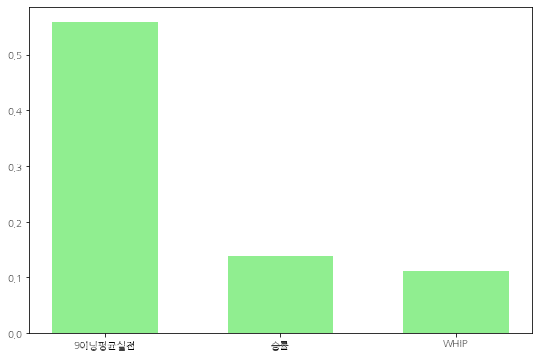

In [ ]:
# 의사결정나무 중요도 변수 top3 시각화

x = np.arange(3)
tree_feature = ['9이닝평균실점', '승률', 'WHIP']
values = [0.55797249, 0.13784122, 0.11085187]

plt.bar(x, values, color = 'lightgreen', width=0.6)
plt.xticks(x, tree_feature)

plt.show()

# Ensemble 모델 - 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=20, random_state=2)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.892


In [ ]:
# 랜덤 포레스트의 성능을 높이기 위해 grid search를 이용하여 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [5, 7, 9, 11]}

In [ ]:
initforest = RandomForestClassifier(random_state=0)
grid_forest = GridSearchCV(initforest, param_grid=params, cv=5, refit=True)
print(grid_forest)

# 파라미터들을 순차적으로 학습, 검증
grid_forest.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, 9, 11]})


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, 9, 11]})

In [ ]:
print('GridSearchCV 최적 파라미터:', grid_forest.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_forest.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 5}
GridSearchCV 최고 정확도: 0.8877


In [ ]:
forest2 = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=2)
forest2.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest2.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest2.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.938


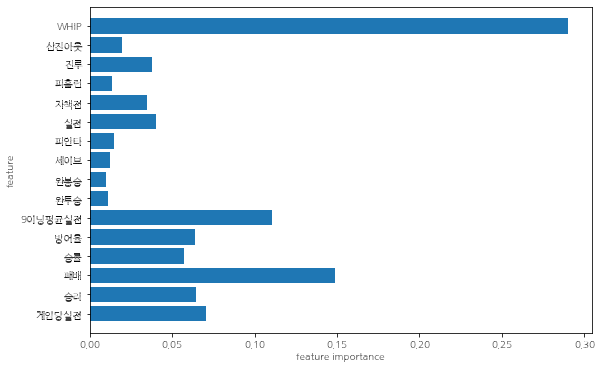

In [ ]:
fm._rebuild()
plot_feature_importances_health(forest2)

# 타깃 변수인 '유망'을 찾아내는데 있어서 중요하게 작용한 변수 in 랜덤 포레스트

In [ ]:
forest2.feature_importances_

array([0.07071498, 0.06455129, 0.14864381, 0.0569669 , 0.06399294,
       0.11074046, 0.01142412, 0.00983764, 0.01267141, 0.01504977,
       0.04005907, 0.0346518 , 0.01356441, 0.03774193, 0.0194499 ,
       0.28993957])

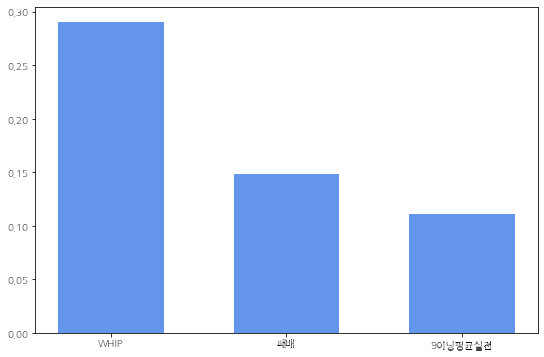

In [ ]:
# 랜덤포레스트 중요도 변수 top3 시각화

x = np.arange(3)
tree_feature = ['WHIP', '패배', '9이닝평균실점']
values = [0.28993957, 0.14864381, 0.11074046]

plt.bar(x, values, color = 'cornflowerblue', width=0.6)
plt.xticks(x, tree_feature)

plt.show()

In [ ]:
KBO_clus = KBO_final.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
clurf = KBO_clus[['WHIP', '패배']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(clurf)

In [ ]:
from sklearn.cluster import KMeans

# 그룹 수, random_state 설정
model = KMeans(n_clusters = 2, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
KBO_clus['cluster'] = model.fit_predict(data_scale)

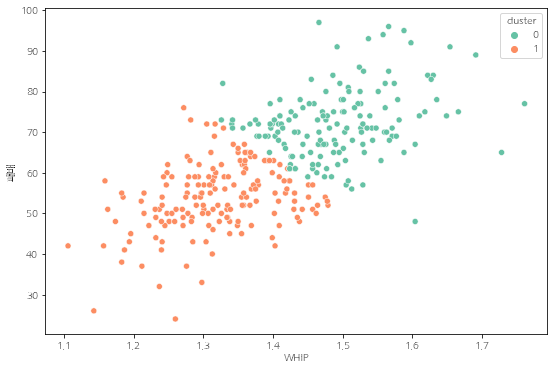

In [ ]:
sns.scatterplot(x='WHIP', y='패배', hue="cluster", data= KBO_clus, palette="Set2");

In [ ]:
# 영향을 많이 못미친 변수로 클러스터링 한다면 ?
# 두 가지 feature를 대상
clurftest = KBO_clus[['완봉승', '세이브']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale2 = scaler.fit_transform(clurftest)

In [ ]:
# 그룹 수, random_state 설정
model2 = KMeans(n_clusters = 2, random_state = 10)

# 정규화된 데이터에 학습
model2.fit(data_scale2)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
KBO_clus['cluster2'] = model2.fit_predict(data_scale2)

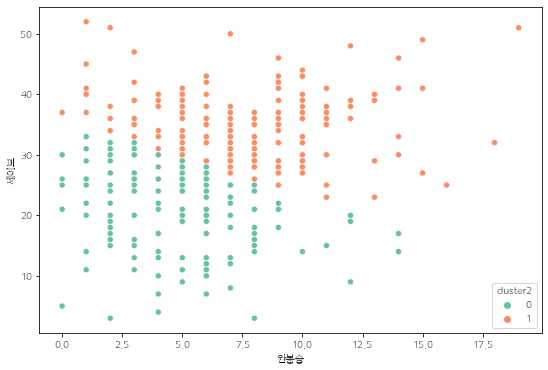

In [ ]:
sns.scatterplot(x='완봉승', y='세이브', hue="cluster2", data= KBO_clus, palette="Set2");

# Ensemble 모델 - 그래디언트 부스팅

In [ ]:
 #Ensemble 모델 - 그래디언트 부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.923


In [ ]:
parameters = {'n_estimators':[20, 25, 30, 100], 'learning_rate':[0.1,0.08, 0.06]}

In [ ]:
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=10, refit=True)

# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06],
                         'n_estimators': [20, 25, 30, 100]})

In [ ]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.06, 'n_estimators': 100}
GridSearchCV 최고 정확도: 0.8803


In [ ]:
gbrt2 = GradientBoostingClassifier(learning_rate = 0.06, n_estimators = 100, random_state=0)
gbrt2.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt2.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt2.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.923


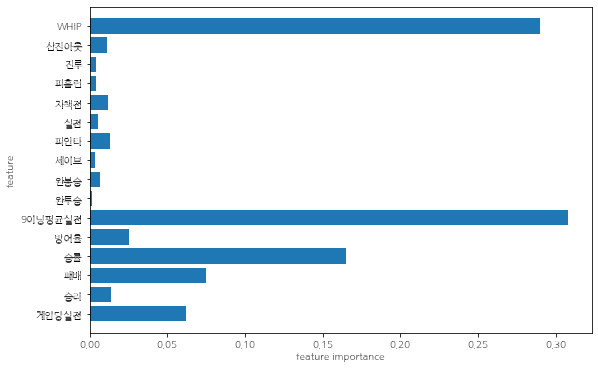

In [ ]:
fm._rebuild()
plot_feature_importances_health(gbrt2)

# 타깃 변수인 '유망'을 찾아내는데 있어서 중요하게 작용한 변수 in gradient boosting

In [ ]:
gbrt2.feature_importances_

array([0.06210894, 0.01364847, 0.07521616, 0.16523158, 0.02506493,
       0.30775083, 0.0015035 , 0.00668771, 0.0035671 , 0.01330437,
       0.00535607, 0.01206928, 0.00390271, 0.0041141 , 0.01095794,
       0.28951632])

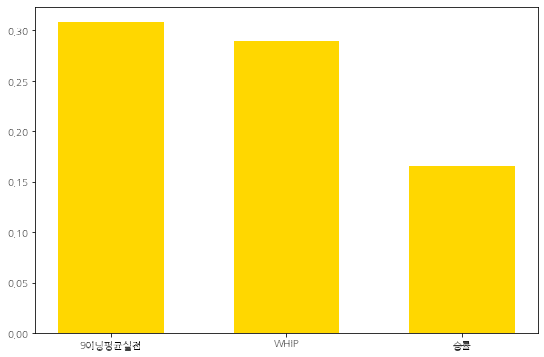

In [ ]:
# 그래디언트 부스팅 중요도 변수 top3 시각화

x = np.arange(3)
tree_feature = ['9이닝평균실점', 'WHIP', '승률']
values = [0.30775083, 0.28951632, 0.16523158]

plt.bar(x, values, color = 'gold', width=0.6)
plt.xticks(x, tree_feature)

plt.show()

In [ ]:
# 두 가지 feature를 대상
clurftest2 = KBO_clus[['9이닝평균실점', 'WHIP']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale3 = scaler.fit_transform(clurftest2)

In [ ]:
# 그룹 수, random_state 설정
model3 = KMeans(n_clusters = 2, random_state = 10)

# 정규화된 데이터에 학습
model3.fit(data_scale3)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
KBO_clus['cluster3'] = model3.fit_predict(data_scale3)

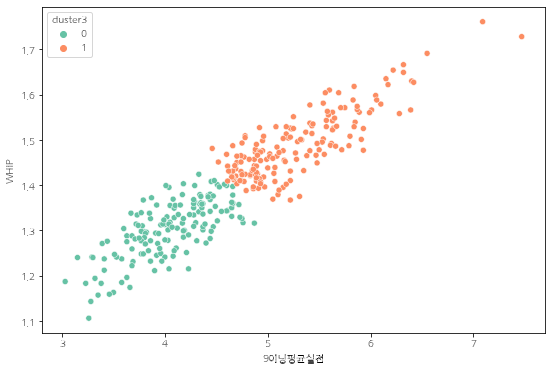

In [ ]:
sns.scatterplot(x='9이닝평균실점', y='WHIP', hue="cluster3", data= KBO_clus, palette="Set2");

# 3개의 모델 평가 - 교차검증

In [ ]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')
print("Decision tree :{:.3f}".format(dt_scores.mean())) 

rf_scores = cross_val_score(forest2, X_train, y_train, cv=10, scoring='accuracy')
print("Random forest :{:.5f}".format(rf_scores.mean())) 

gbrt_scores = cross_val_score(gbrt2, X_train, y_train, cv=10, scoring='accuracy')
print("Gradient boosting :{:.5f}".format(gbrt_scores.mean())) 

# 교차검증 방식으로 평가 했을 때, 근소한 차이로 Gradient boosting 모델이 가장 잘 분류해냄을 확인했다.

Decision tree :0.865
Random forest :0.88015
Gradient boosting :0.88031


# 3개의 모델 평가 - 정오분류표

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

dt_pred = tree.predict(X_test)
rf_pred = forest2.predict(X_test)
grid_gbrt_pred = gbrt2.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))

# 정오분류표 방식으로 평가 했을 때, 근소한 차이로 randomforest 모델이 가장 잘 분류해냄을 확인했다.

Decision tree 시험용 데이터 세트 정확도:0.908
[[27  2]
 [ 4 32]]
Random forest 시험용 데이터 세트 정확도:0.938
[[26  3]
 [ 1 35]]
Gradient boosting 시험용 데이터 세트 정확도:0.923
[[27  2]
 [ 3 33]]


평가 결론 

: 일반적인 decision tree 보다는 앙상블 모델이 더 나은 성능을 보임을 확인했다.

  앙상블의 두 모델(랜덤포레스트, 그래디언트 부스팅)은 거의 유사한 성능을 보이며 작동했다.

# 데이터 만들어서 분류기능 실험하기

In [ ]:
# 선수 B - NO예측
#게임당실점   승리   패배   승률   방어율   9이닝평균실점   완투승   완봉승   세이브   피안타   실점   자책점   피홈런   진루   삼진아웃   WHIP
#5.90          70     71    0.430    2.99     3.56             7       11       18      1380     703     760      111     570     388      1.868

# 선수A - yes 예측 
# 4.5  72  55  0.6  4.03  2.6  26  12  45  1115  270 501  113  333  1100  1.43 


test1 = pd.DataFrame({'게임당실점':[5.90, 4.5], '승리':[70, 72], '패배':[71, 55],'승률':[0.430, 0.6], '방어율':[2.99, 4.03], '9이닝평균실점':[3.56, 2.6], 
                      '완투승':[7, 26], '완봉승':[11, 12], '세이브':[18, 45], '피안타':[1380, 1115], '실점':[703, 270], '자책점':[760, 501], '피홈런':[111, 113], '진루':[570, 333], '삼진아웃':[388, 1100], 'WHIP':[1.868, 1.43]})

forest2.predict(test1)

array(['no', 'yes'], dtype=object)